# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units={units}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kingston
Processing Record 2 of Set 1 | kailua-kona
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | wolsztyn
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | fale old settlement
Processing Record 9 of Set 1 | isangel
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | vilyuchinsk
Processing Record 12 of Set 1 | upper coomera
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | porto novo
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | sitka
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | kem'
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | naze
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | adamstown
P

Processing Record 40 of Set 4 | albany
Processing Record 41 of Set 4 | reggane
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | udachny
Processing Record 44 of Set 4 | tibanbang
Processing Record 45 of Set 4 | kurmuk
Processing Record 46 of Set 4 | lagunas
Processing Record 47 of Set 4 | zachary
Processing Record 48 of Set 4 | djibo
Processing Record 49 of Set 4 | wynyard
Processing Record 0 of Set 5 | yuzhno-kurilsk
Processing Record 1 of Set 5 | palikir - national government center
Processing Record 2 of Set 5 | kalmunai
Processing Record 3 of Set 5 | avarua
Processing Record 4 of Set 5 | krasnokholm
Processing Record 5 of Set 5 | fort bragg
Processing Record 6 of Set 5 | hadibu
Processing Record 7 of Set 5 | guangyuan
Processing Record 8 of Set 5 | los frentones
Processing Record 9 of Set 5 | ascencion
Processing Record 10 of Set 5 | kudymkar
Processing Record 11 of Set 5 | rio gallegos
Processing Record 12 of Set 5 | invercargill
Processing Record 13 of Set 5 |

Processing Record 30 of Set 8 | zakamensk
Processing Record 31 of Set 8 | aykhal
Processing Record 32 of Set 8 | dien bien phu
Processing Record 33 of Set 8 | tadine
Processing Record 34 of Set 8 | port glaud
City not found. Skipping...
Processing Record 35 of Set 8 | alma
Processing Record 36 of Set 8 | rongelap
Processing Record 37 of Set 8 | robore
Processing Record 38 of Set 8 | cabimas
Processing Record 39 of Set 8 | shibushi
Processing Record 40 of Set 8 | slave lake
Processing Record 41 of Set 8 | auki
Processing Record 42 of Set 8 | vilyuysk
Processing Record 43 of Set 8 | rapid city
Processing Record 44 of Set 8 | prainha
Processing Record 45 of Set 8 | daru
Processing Record 46 of Set 8 | hushitai
Processing Record 47 of Set 8 | tanrake village
City not found. Skipping...
Processing Record 48 of Set 8 | bardai
Processing Record 49 of Set 8 | salalah
Processing Record 0 of Set 9 | huocheng
City not found. Skipping...
Processing Record 1 of Set 9 | goondiwindi
Processing Record

Processing Record 20 of Set 12 | rosarito
Processing Record 21 of Set 12 | amga
Processing Record 22 of Set 12 | port hueneme
Processing Record 23 of Set 12 | manakara
Processing Record 24 of Set 12 | el abiodh sidi cheikh
Processing Record 25 of Set 12 | lata
Processing Record 26 of Set 12 | luganville
Processing Record 27 of Set 12 | newman
Processing Record 28 of Set 12 | mosjoen
Processing Record 29 of Set 12 | dakhla
Processing Record 30 of Set 12 | vadso
Processing Record 31 of Set 12 | red oak
Processing Record 32 of Set 12 | burang
Processing Record 33 of Set 12 | tocopilla
Processing Record 34 of Set 12 | sibiti
Processing Record 35 of Set 12 | kenai
Processing Record 36 of Set 12 | rio branco
Processing Record 37 of Set 12 | kismayo
Processing Record 38 of Set 12 | tulun
Processing Record 39 of Set 12 | oxapampa
Processing Record 40 of Set 12 | kulhudhuffushi
Processing Record 41 of Set 12 | greenfield
Processing Record 42 of Set 12 | orange
Processing Record 43 of Set 12 | n

In [21]:
city_weather

{'coord': {'lon': 97.7333, 'lat': 39.8333},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 72.09,
  'feels_like': 70.5,
  'temp_min': 72.09,
  'temp_max': 72.09,
  'pressure': 1006,
  'humidity': 32,
  'sea_level': 1006,
  'grnd_level': 800},
 'visibility': 10000,
 'wind': {'speed': 5.53, 'deg': 257, 'gust': 5.84},
 'clouds': {'all': 1},
 'dt': 1691263373,
 'sys': {'country': 'CN', 'sunrise': 1691274707, 'sunset': 1691325496},
 'timezone': 28800,
 'id': 1280757,
 'name': 'Laojunmiao',
 'cod': 200}

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kingston,17.9970,-76.7936,94.24,65,15,11.01,JM,1691262820
1,kailua-kona,19.6406,-155.9956,81.50,74,40,8.05,US,1691263304
2,waitangi,-43.9535,-176.5597,48.25,59,100,33.35,NZ,1691263304
3,wolsztyn,52.1155,16.1171,62.22,97,100,4.72,PL,1691263304
4,hawaiian paradise park,19.5933,-154.9731,77.90,91,100,4.61,US,1691263305


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kingston,17.9970,-76.7936,94.24,65,15,11.01,JM,1691262820
1,kailua-kona,19.6406,-155.9956,81.50,74,40,8.05,US,1691263304
2,waitangi,-43.9535,-176.5597,48.25,59,100,33.35,NZ,1691263304
3,wolsztyn,52.1155,16.1171,62.22,97,100,4.72,PL,1691263304
4,hawaiian paradise park,19.5933,-154.9731,77.90,91,100,4.61,US,1691263305


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

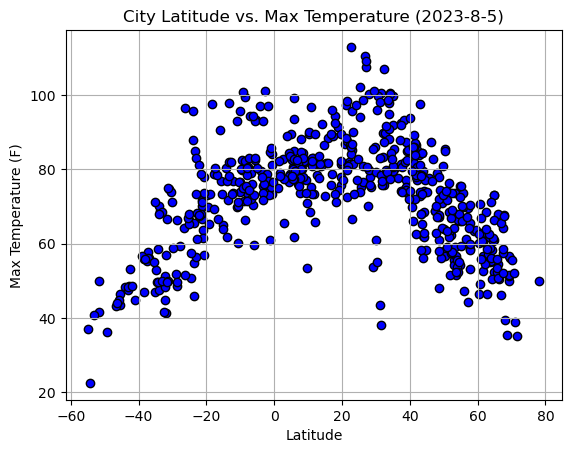

In [34]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "blue", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (2023-8-5)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

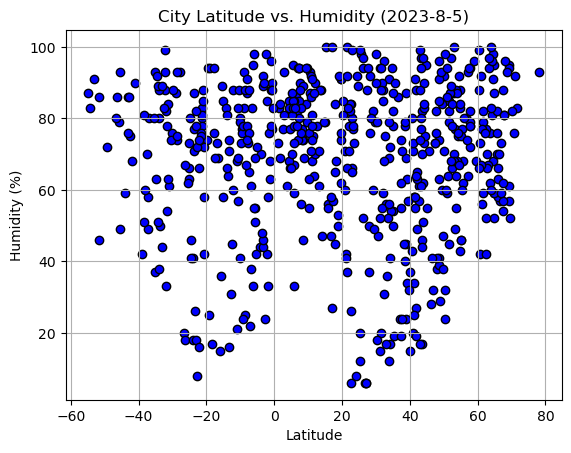

In [35]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "blue", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (2023-8-5)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

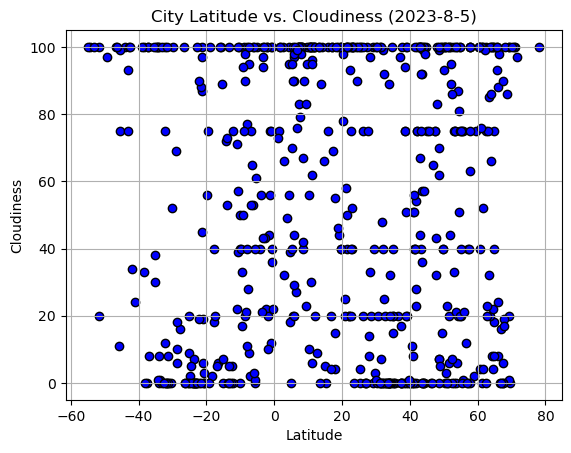

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "blue", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (2023-8-5)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

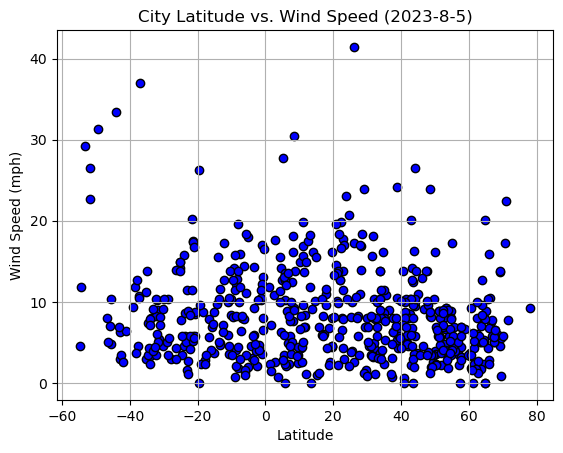

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "blue", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (2023-8-5)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df ["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kingston,17.9970,-76.7936,94.24,65,15,11.01,JM,1691262820
1,kailua-kona,19.6406,-155.9956,81.50,74,40,8.05,US,1691263304
3,wolsztyn,52.1155,16.1171,62.22,97,100,4.72,PL,1691263304
4,hawaiian paradise park,19.5933,-154.9731,77.90,91,100,4.61,US,1691263305
9,ribeira grande,38.5167,-28.7000,74.77,78,75,6.91,PT,1691263305


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,48.25,59,100,33.35,NZ,1691263304
5,blackmans bay,-43.0167,147.3167,47.52,86,93,6.24,AU,1691263244
6,carnarvon,-24.8667,113.6333,65.71,80,2,7.74,AU,1691263305
7,fale old settlement,-9.3852,-171.2468,82.49,77,33,14.12,TK,1691263305
8,isangel,-19.5500,169.2667,69.91,94,75,0.00,VU,1691263305


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


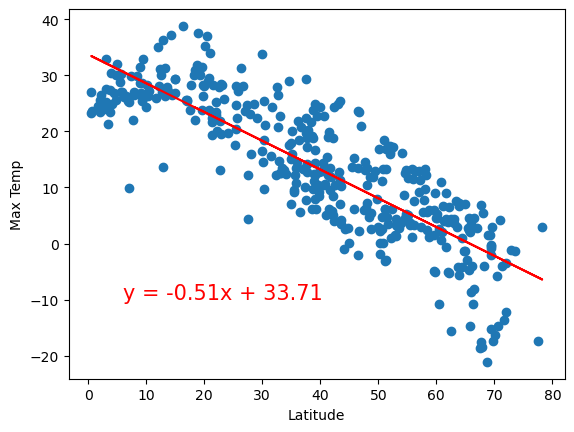

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


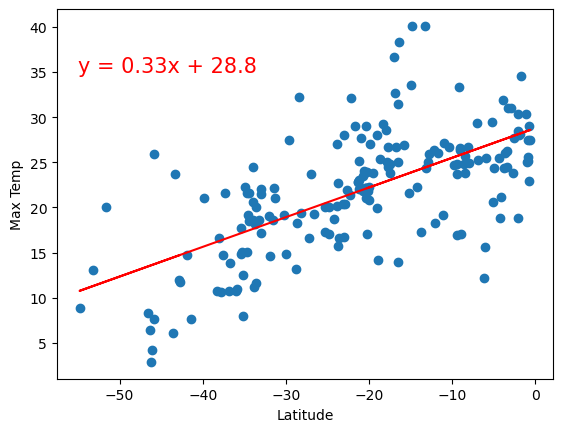

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


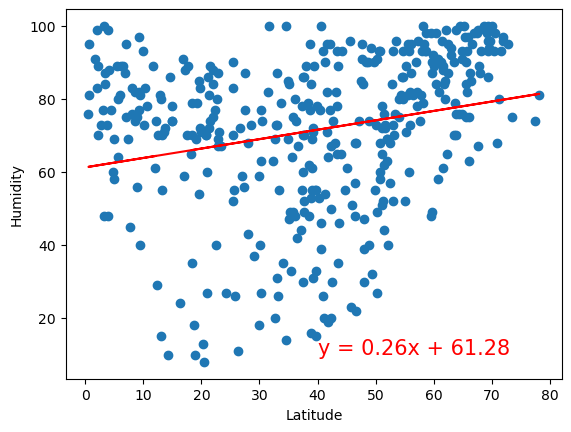

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


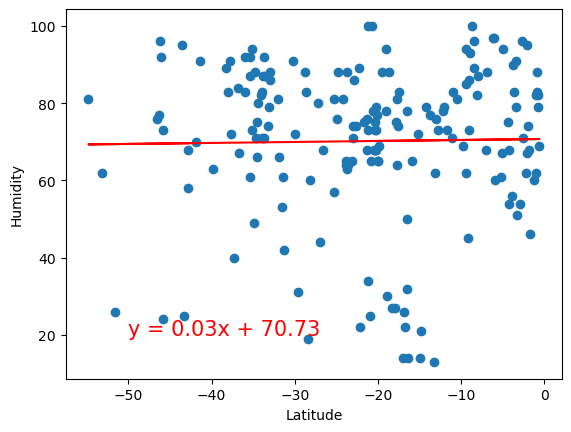

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


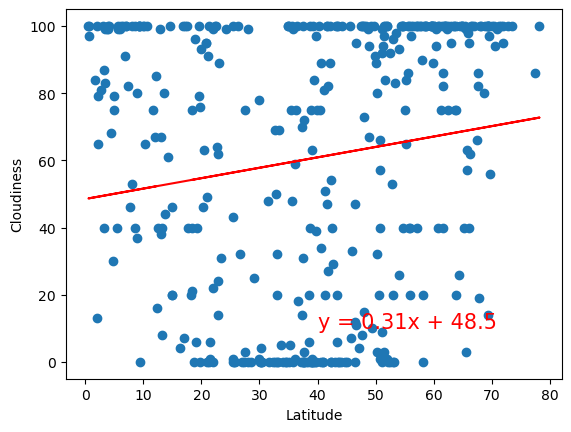

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


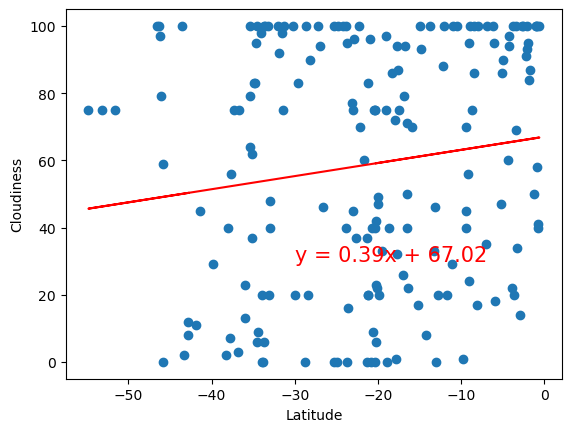

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


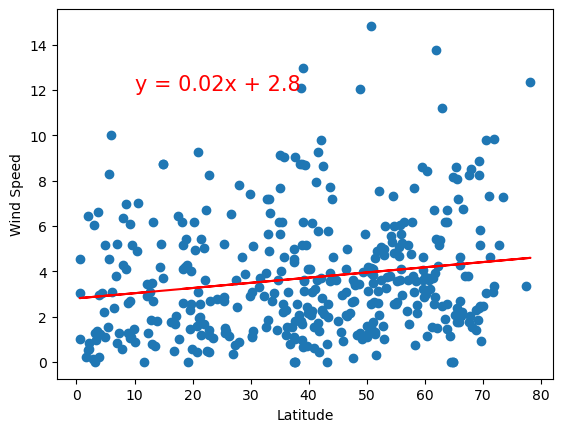

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


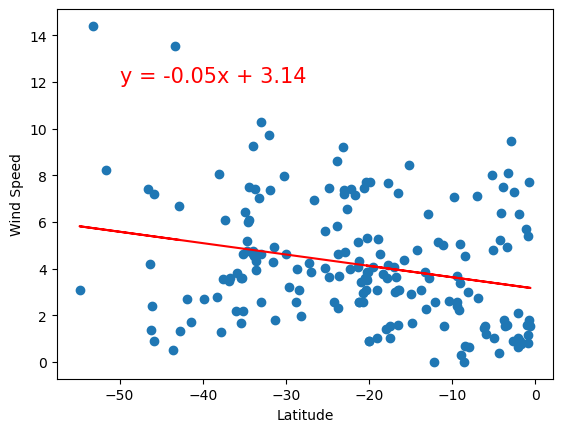

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE